# Data Cleaning/Preparation for Distribution of Obesity Levels
## AAI 500 Final Group Project Fall 2024
### Group 1

## Import

Import necessary libraries and read the CSV file into a Pandas DataFrame.

In [59]:
import csv 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## Missing Values

Check for missing values in the dataset. Below code output shows no missing values.

In [60]:
""" Missing Values """
# Check for missing values
missing_values = df.isnull().sum().sum()
print("Total missing values:", missing_values)

# Check for missing values in each column
missing_values_per_column = df.isnull().sum()
print("\nMissing values per column:\n", missing_values_per_column)

Total missing values: 0

Missing values per column:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObesity                          0
dtype: int64


## Outliers

Check for outliers, and handle as necessary by replacing outlier values with the mean of the respective data column.

In [68]:
""" Outliers """
# Select numerical columns only
numerical_columns = df.select_dtypes(include='number').columns

# Iterate over each numerical column
for column in numerical_columns:
    # Calculate Z-scores for the current column
    z_scores = zscore(df[column].dropna())

    # Define a threshold for outliers (can adjust as needed)
    threshold = 3

    # Find outliers based on threshold
    outliers_index = np.where((z_scores > threshold) | (z_scores < -threshold))[0]

    # Print outliers per column
    print(f"Outliers in {column}: {df.iloc[outliers_index][column].tolist()}")
    print(f"Count of Outliers in {column}: {len(df.iloc[outliers_index][column].tolist())}")

Outliers in Age: [52.0, 55.0, 61.0, 44.0, 55.0, 45.0, 51.0, 56.0, 45.0, 55.24625, 50.832559, 45.0, 55.137881, 46.491859, 55.022494, 47.7061, 45.821267, 43.604901, 43.510672, 47.283374, 43.591999, 43.719395, 43.37634, 43.726081]
Count of Outliers in Age: 24
Outliers in Height: []
Count of Outliers in Height: 0
Outliers in Weight: [173.0]
Count of Outliers in Weight: 1
Outliers in FCVC: []
Count of Outliers in FCVC: 0
Outliers in NCP: []
Count of Outliers in NCP: 0
Outliers in CH2O: []
Count of Outliers in CH2O: 0
Outliers in FAF: []
Count of Outliers in FAF: 0
Outliers in TUE: []
Count of Outliers in TUE: 0


Graphical depiction of outliers using box plots, for illustrative purposes.

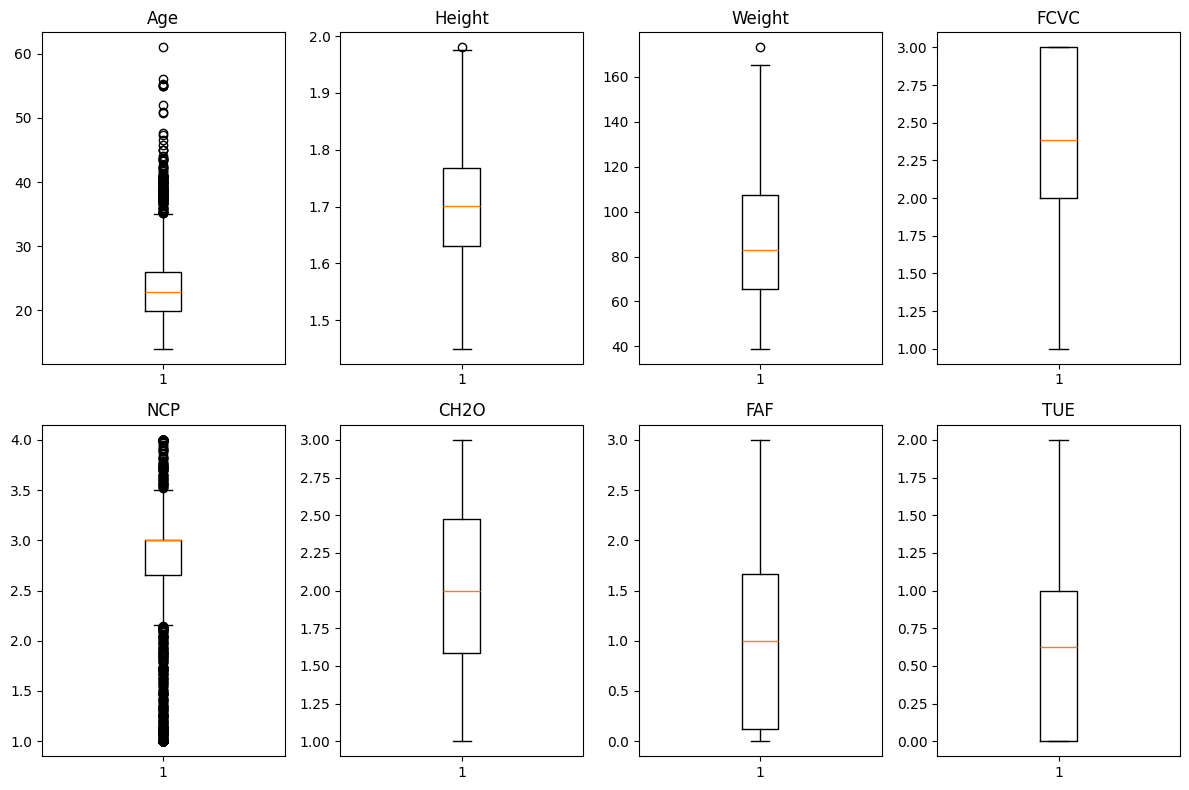

In [62]:
# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Create individual box plots for each numerical column of data
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_columns) / 4)), ncols=4, figsize=(12, 8))

for i, column in enumerate(numerical_columns):
    row, col = i // 4, i % 4
    axes[row, col].boxplot(df[column])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

'Age' appears to be right-skewed. It is certainly not normal, corroborated by the histogram and Shapiro-Wilk test, which output a very small p-value.

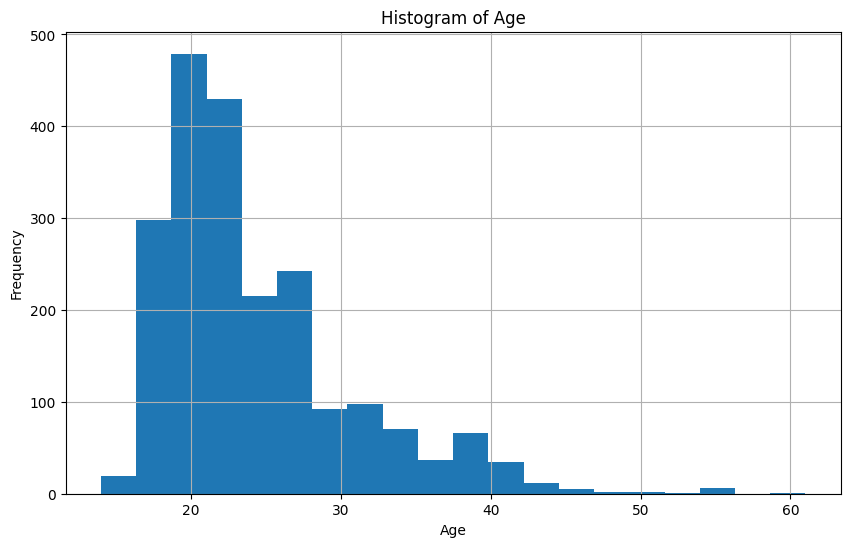

Shapiro-Wilk Test:
Statistic: 0.866
P-value: 3.518277918766476e-39


In [63]:
# Histogram of Age column
plt.figure(figsize=(10, 6))
df['Age'].plot.hist(bins=20)  # Adjust the number of bins as needed
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(df['Age'])
print("Shapiro-Wilk Test:")
print("Statistic:", round(statistic,3))
print("P-value:", p_value) 

# Output:
# Statistic: 0.866
# P-value: 3.518277918766476e-39
# Data is not normally distributed.

Replace or otherwise handle outliers. As shown above, there are 24 outliers in 'Age' and 1 outlier in 'Weight'. 'Age' outliers will not be altered as age is right skewed, so these outliers likely come with the respective distribution.

As a result of the 'Weight' outlier, the column will be winsorized. This replaces the 5% of the lowest and highest values with the 5th and 95th percentiles, respectively. The boxplot of the winsorized 'Weight' column values shows no outliers.

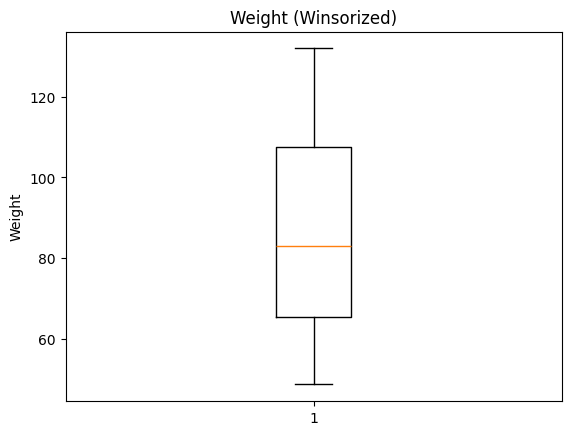

In [73]:
# Winsorize 'Weight' column
winsorized_weight = df['Weight'].clip(lower=df['Weight'].quantile(0.05), upper=df['Weight'].quantile(0.95))

# Replace original 'Weight' column with winsorized version
df['Weight'] = winsorized_weight

# Write to datafile
df.to_csv('ObesityDataSet_raw_and_data_sinthetic.csv', index=False)

# Boxplot of 'Weight'
plt.boxplot(df['Weight'])
plt.title('Weight (Winsorized)')
plt.ylabel('Weight')
plt.show()



## Categorical Variables

Standardize or encode categorical variables.

In [65]:
""" Categorical variables """
# Encode categorical variables

' Categorical variables '

## Feature Engineering

Create new features for body-mass index (BMI), or others as needed.
BMI, specifically, is what feeds into the categories of obesity levels (underweight, normal, overweight, etc.)

In [71]:
""" Feature engineering """
# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Write the updated DataFrame back to the CSV file (add BMI column to datafile csv)
df.to_csv("ObesityDataSet_raw_and_data_sinthetic.csv", index=False)